In [1]:
import torch 

from torchvision import utils
from torchvision import models 
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt 


In [2]:
data_path = './/data//'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_dataset = datasets.CIFAR10(data_path, train=False, download=True)

170500096it [02:42, 6864326.90it/s]Extracting .//data//cifar-10-python.tar.gz to .//data//
Files already downloaded and verified
170500096it [03:00, 6864326.90it/s]

In [3]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [4]:
len(dataset)

50000

In [8]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2B7595DDB08>, 9, 'truck')

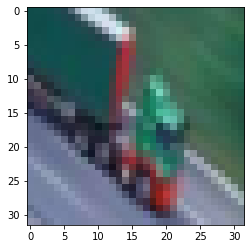

In [9]:
plt.imshow(img)

In [10]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor , img_tensor.shape 

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2B7595DDB08>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0.

In [11]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform= transforms.ToTensor())

Files already downloaded and verified


In [12]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [14]:
img.min(),img.max()

(tensor(0.0314), tensor(0.9529))

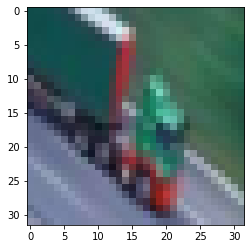

In [15]:
plt.imshow(img.permute(1,2,0))

In [16]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim = 3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
imgs.view(3, -1).mean(dim = 1)

tensor([0.4915, 0.4823, 0.4468])

In [20]:
imgs.view(3, -1).std(dim = 1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), 
               (0.2470, 0.2435, 0.2616))
              ])

In [22]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform= transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

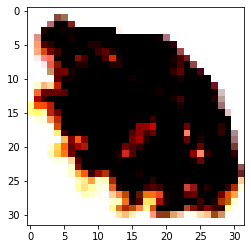

In [25]:
img_transformaed, label = dataset[125]
plt.imshow(img_transformaed.permute(1,2,0))
classes[label]

tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1],
        [2],
        [3],
        [4]])
